In [1]:
import os, torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from scipy.signal import find_peaks
import numpy as np, matplotlib.pyplot as plt, pandas as pd
import neurokit2, sleepecg, wfdb.processing

In [2]:
df100 = pd.read_csv('LZ/data/100.csv')
df100.columns = ['samp_num', 'MLII', 'V5']
mlii_signal = df100['MLII'].values

In [3]:
results = neurokit2.ecg_peaks(mlii_signal, sampling_rate=360)
results

(        ECG_R_Peaks
 0                 0
 1                 0
 2                 0
 3                 0
 4                 0
 ...             ...
 649995            0
 649996            0
 649997            0
 649998            0
 649999            0
 
 [650000 rows x 1 columns],
 {'method_peaks': 'neurokit',
  'method_fixpeaks': 'None',
  'ECG_R_Peaks': array([   370,    663,    947, ..., 649232, 649485, 649734]),
  'sampling_rate': 360})

In [9]:
# 3 different way to get rpeaks
rpeaks1 = results[1]["ECG_R_Peaks"]
rpeaks2 = sleepecg.detect_heartbeats(mlii_signal, fs=360)
rpeaks3 = wfdb.processing.xqrs_detect(mlii_signal, fs=360, verbose=False)

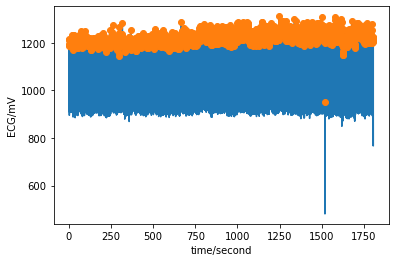

In [10]:
fig = wfdb.plot_items(
    mlii_signal,
    [rpeaks1],
    fs=360,
    sig_name=["ECG"],
    sig_units=["mV"],
    time_units="seconds",
    return_fig=True,
    ann_style="o",
)

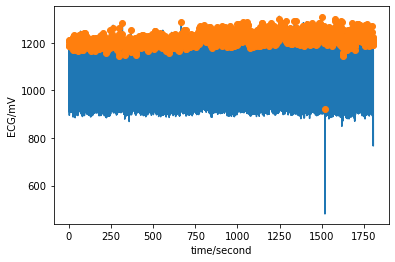

In [11]:
fig = wfdb.plot_items(
    mlii_signal,
    [rpeaks2],
    fs=360,
    sig_name=["ECG"],
    sig_units=["mV"],
    time_units="seconds",
    return_fig=True,
    ann_style="o",
)